## Curve fitting
Through curve fitting exercise, you will understand the basics of regression.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import random

import default_settings as default

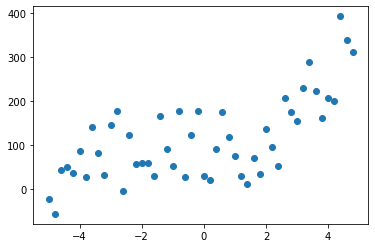

In [2]:
# load samples.
with open('data/regression_samples.txt') as f:
    lines = f.read().split('\n')
X = [float(line.split()[0]) for line in lines if len(line.split()) > 0]
Y = [float(line.split()[1]) for line in lines if len(line.split()) > 0]

X = np.array(X)
Y = np.array(Y)
# display the points.
plt.scatter(X, Y)


## problem description
You will find a curve that fit the above scatter the best.   
Let's assume the curve is described as: f(x, w) = a + b * x + c * x^2 + d * x^3.  
Your task is to find w = [a, b, c, d].   
  
Here is our approach.  

1. Initialize w with some numbers.
2. Calculate how good f(x, w) fits the scatters by defining the cost function. For now, cost function is the root mean square error devided by the number of points. 
3. Update w using gradient descent, until the cost becomes small enough. 

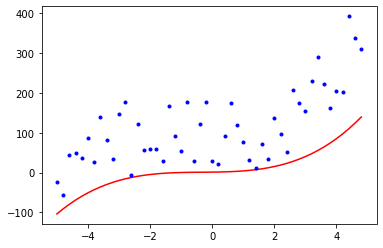

In [3]:
# initilize w.
w = [1, 1, 1, 1]

# define function. 
def f_(x, w):
    ### WRITE YOUR OWN CODES ### 
    #y = w[0] + w[1] * x + w[2] * np.power(x,2) + w[3] * np.power(x,3)
    y = w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3
    
    return y


# calculate predictions y
Y_predict = f_(X, w)
# display the points.
plt.plot(X,Y_predict,'r-')
plt.plot(X,Y,'b.')
plt.show()


In [4]:
# define cost function.
def cost_function(w, X, Y):
    ### WRITE YOUR OWN CODES ### 
    m = len(Y)
    
    Y_predict = f_(X, w)
    cost = (1/(2*m)) * np.sum(np.square(Y_predict-Y))
    
    return cost


In [5]:
cost = cost_function(w, X, Y)
print(cost)


7820.013331528799


In [6]:
# update w using gradient descent. 
def update_w(w, X, Y, learning_rate=0.01, iterations=100):
    ### WRITE YOUR OWN CODES ### 
    m = len(Y)
    cost_history = np.zeros(iterations)
    w_history = np.zeros((iterations,4))
    
    for it in range(iterations):
        
        Y_predict = f_(X, w)
        
        # if f = a + bx, the below equation is correct.
        # but in our case, X * (Y_pred - Y) does not work. Why?
        # w = w -(1/m)*learning_rate*( X.T.dot((Y_predict - Y)))
        
        # fix update w
        w[0] = w[0] -(1/m)*learning_rate*( np.sum(Y_predict - Y))
        w[1] = w[1] -(1/m)*learning_rate*( X.T.dot((Y_predict - Y)))
        w[2] = w[2] -(1/m)*learning_rate*( (X**2).T.dot((Y_predict - Y)))
        w[3] = w[3] -(1/m)*learning_rate*( (X**3).T.dot((Y_predict - Y)))
        
        
        
        w_history[it,:] =w
        cost_history[it]  = cost_function(w,X,Y)
    
    return cost_history, w_history


In [7]:
print(w)
learning_rate = 0.0001
iteration = 10000

cost_history, w_history = update_w(w, X, Y, learning_rate, iteration)
w_min = w_history[np.argmin(cost_history)]
print(w_min)


[1, 1, 1, 1]
[30.67592869 -4.2169445   7.75586232  1.8275683 ]


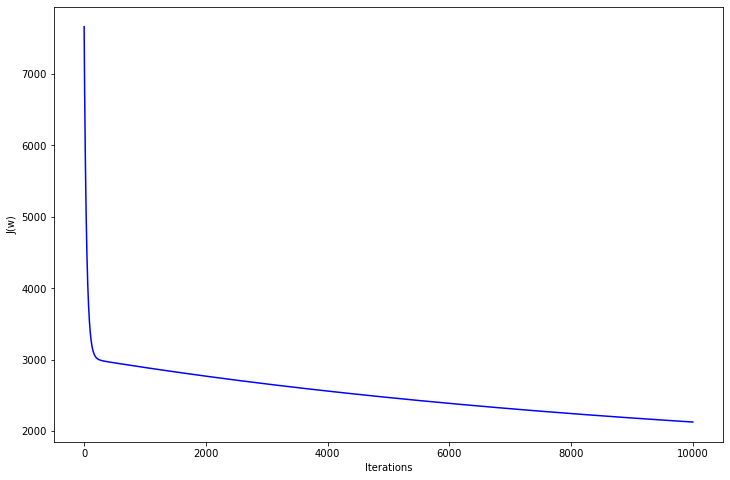

In [8]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(w)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iteration),cost_history,'b-')


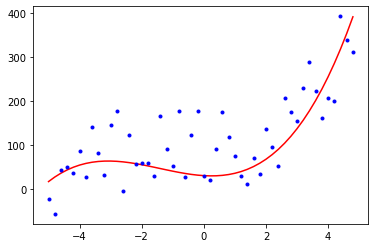

In [9]:
# calculate predictions y
Y_predict2 = f_(X, w_min)
# display the points.
plt.plot(X,Y_predict2,'r-')
plt.plot(X,Y,'b.')
plt.show()


[ 1.82462548  4.25468041 -4.86778247 82.8907388 ]


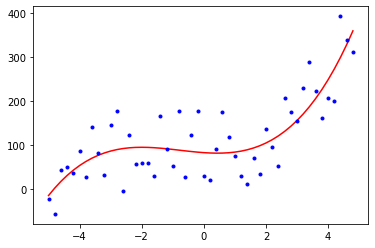

In [10]:
# Test existing function
coe = np.polyfit(X, Y, 3)
print(coe)
Y_fit = coe[0] * X ** 3 + coe[1] * X ** 2 + coe[2] * X + coe[3]
plt.plot(X,Y_fit,'r-')
plt.plot(X,Y,'b.')
plt.show()

## Hint: Gredient descent.
To make the situation easier, let's update w only once.   
Let's denote cost_function as J(w, X, Y) = 1/(2m) * (Y_pred - Y)^2.  
In Gredient descient, update w as w- learning_rate * dJ/dw (partial derivative).  
dJ/dw = (Y_pred - Y)/m * d(Y_pred - Y)/dw  

in our case y = w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3, therefore:  
- dJ[0] = (Y_predict - Y)/m
- dJ[1] = (Y_predict - Y)/m * x
- dJ[2] = (Y_predict - Y)/m * x**2
- dJ[3] = (Y_predict - Y)/m * x**3

Reference: 
- https://mathwords.net/saikyukouka
- https://qiita.com/Takayoshi_Makabe/items/ee467313c38b1879c097

In [11]:
def update_w1(w, X, Y, learning_rate = 0.001):
    m = len(Y)
    
    # w to update.
    w_ = np.copy(np.array(w))
    
    ### WRITE YOUR OWN CODES: BEGIN ### 
    Y_predict = f_(X, w)
    error = Y_predict - Y
    w_[0] = w[0] - learning_rate /m * np.sum(error)
    w_[1] = w[1] - learning_rate /m * np.dot(X.T, error)
    w_[2] = w[2] - learning_rate /m * np.dot((X**2).T, error)
    w_[3] = w[3] - learning_rate /m * np.dot((X**3).T, error)
    ### WRITE YOUR OWN CODES: END ### 
    
    return w_

# gradient descent loop.
def gradient_descent(w0, X, Y, learning_rate = 0.001, n_iter = 100):    
    J_history = []
    w_history = []
    w = np.copy(w0)
    #w = np.array(w0.copy())
    for i in range(n_iter):
        ### WRITE YOUR OWN CODES: BEGIN ### 
        # update w.
        w1 = update_w1(w, X, Y, learning_rate)
        
        # add value to J_history and w_history.
        J_history.append(cost_function(w1, X, Y))
        w_history.append(w1)
        
        # update w.
        #w0 = w
        w = np.copy(w1)
        
        ### WRITE YOUR OWN CODES: END ###
    return w_history, J_history

at iteration 443168, J takes mininum value.


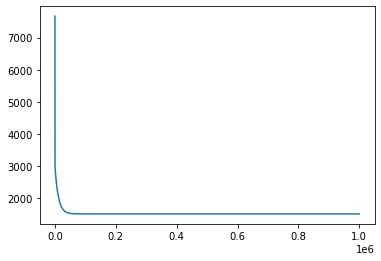

In [12]:
## check
# display cost function.
w_np = np.ones(4)
w_history, J_history = gradient_descent(w_np, X, Y, learning_rate = 0.0001, n_iter = 1000000)
plt.plot(J_history)
print('at iteration {}, J takes mininum value.'.format(np.argmin(J_history)))

[82.89073854 -4.86778248  4.25468043  1.82462548] <class 'numpy.ndarray'>


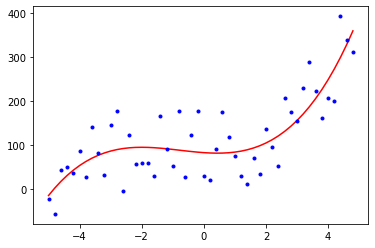

In [13]:
## display curve.
# get the min value of J.
w_best = w_history[np.argmin(J_history)]
print(w_best, type(w_best))
Y_pred = f_(X, w_best)

plt.plot(X, Y_pred, 'r-')
plt.plot(X, Y, 'b.')
plt.show()